## Import

In [342]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam, Adamax

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from tensorflow.keras import layers

from keras.layers import Conv1D, MaxPooling1D


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [343]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


# Dataset info

In [344]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [345]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [347]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [348]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [349]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

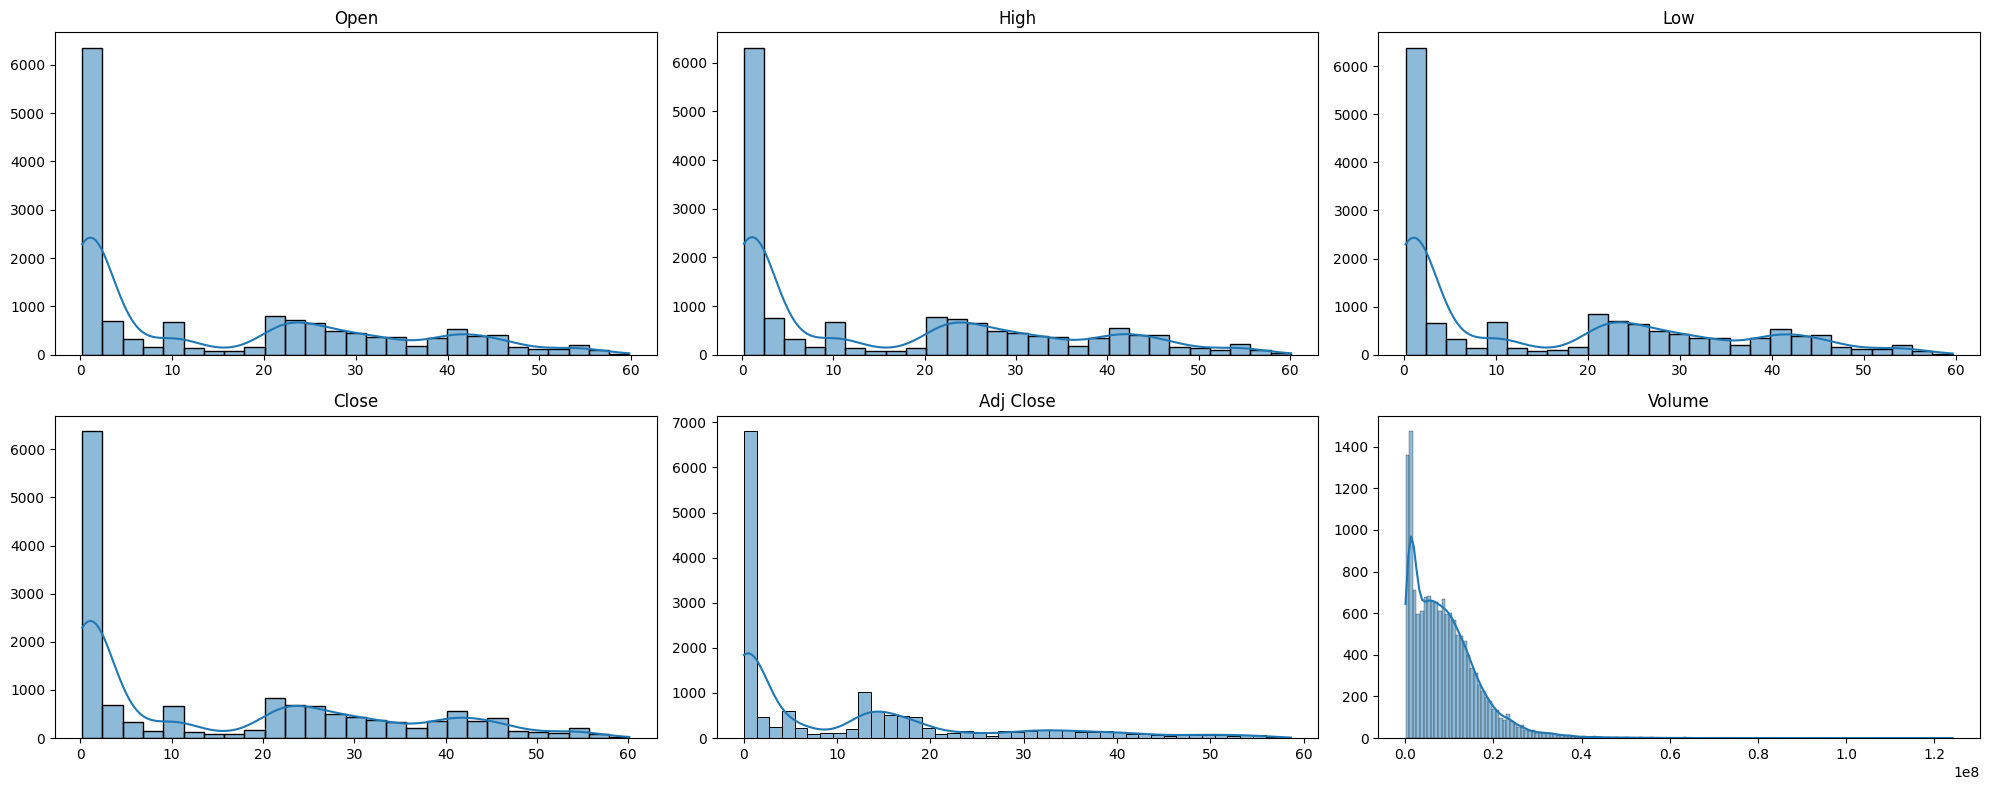

In [350]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

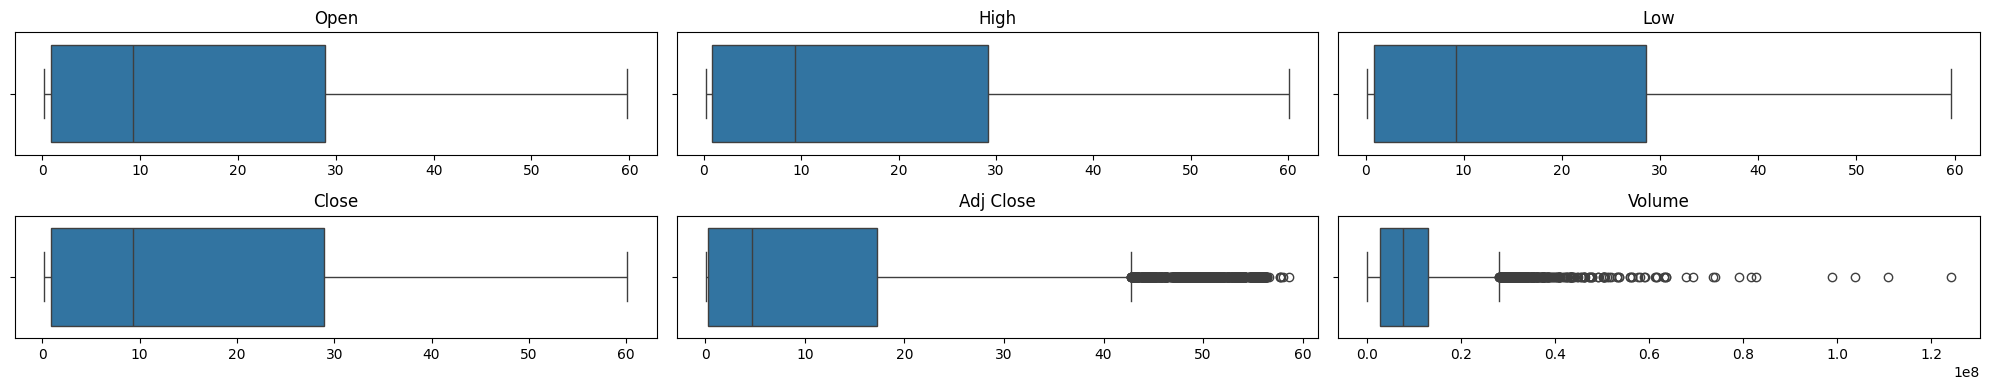

In [351]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [352]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

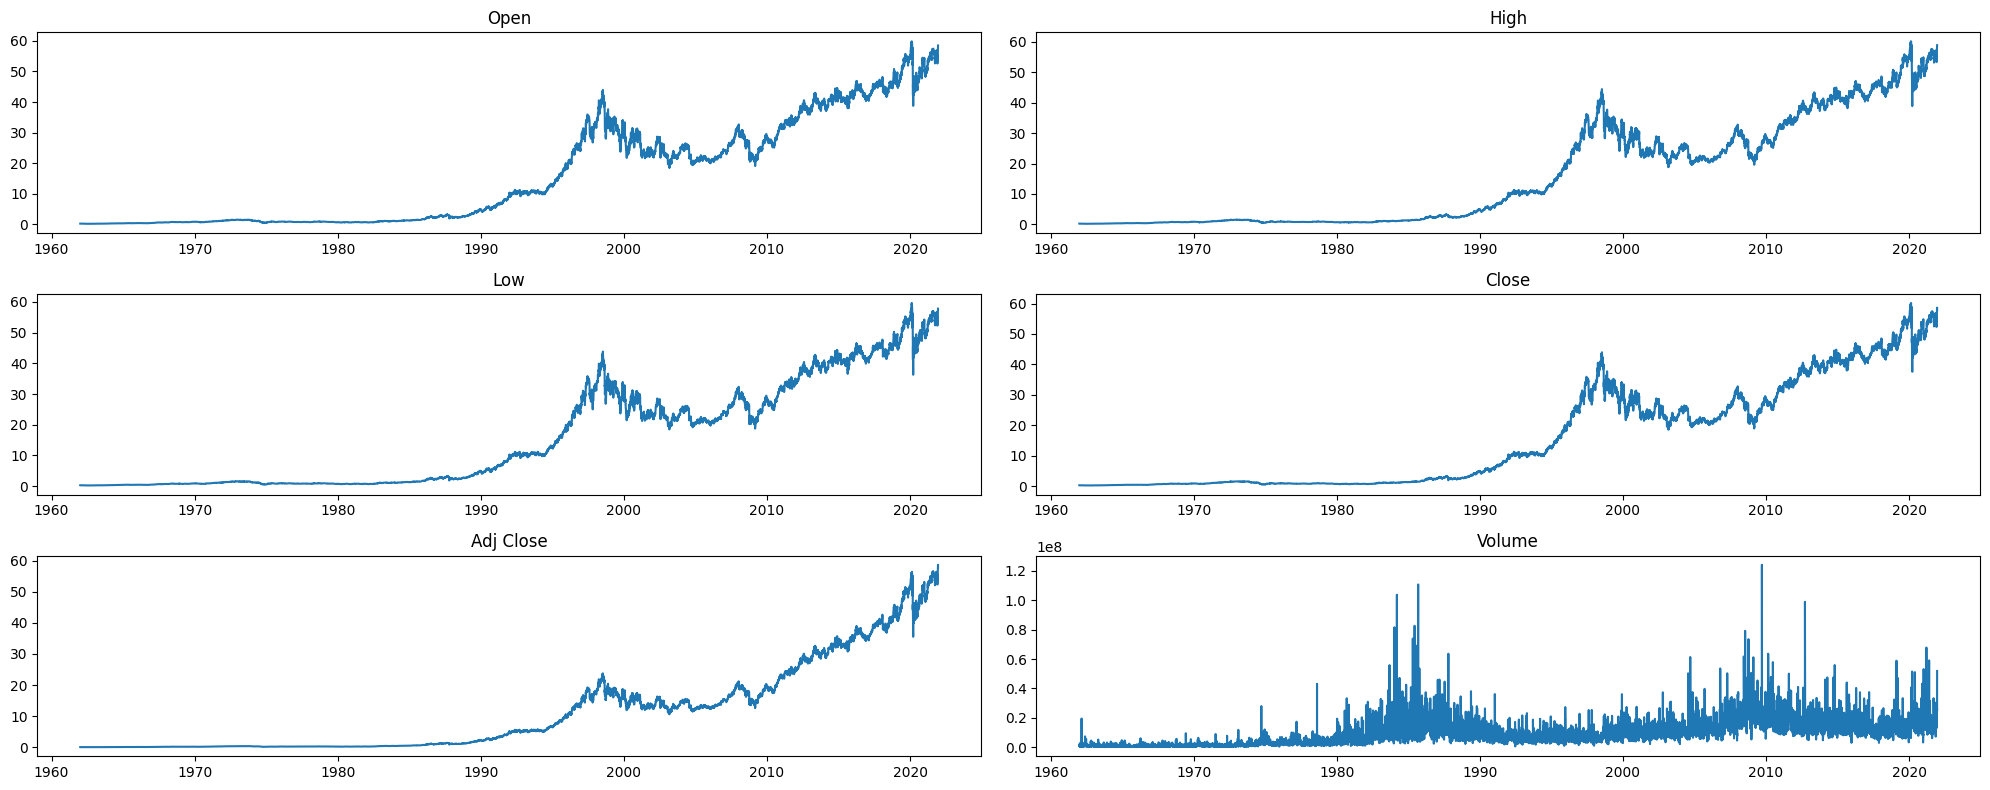

In [353]:
plot(data, columns, 'Date')

In [354]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


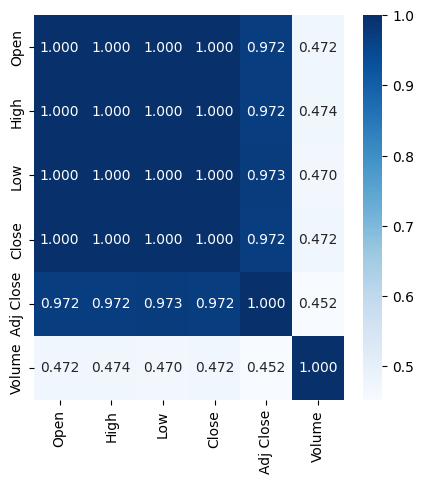

In [355]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

# Podela podataka na test, train i val

Podela podataka na train, val i test skup (70%, 20%, 10%).

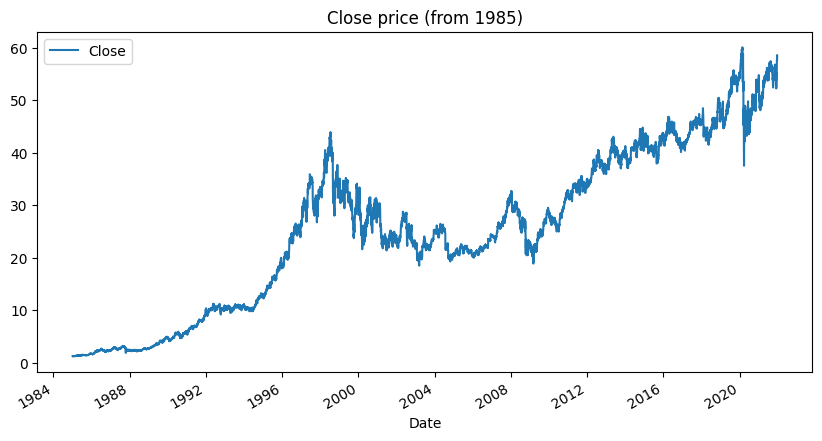

In [356]:
relevant_data = data["1985":]

relevant_data[["Close"]].plot(figsize=(10, 5))
plt.title("Close price (from 1985)")
plt.show()

In [357]:
data = data["1985":]

In [358]:
data = data.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume'])

In [359]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (6522, 1) 
Validation size :  (1864, 1) 
Test Size :  (932, 1)


,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2010-11-03,30.975000
2010-11-04,31.225000
2010-11-05,31.290001


In [360]:
train_df.columns

Index(['Close'], dtype='object')

# Normalizacija podataka

In [361]:
scaler = MinMaxScaler()

col = ['Close']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [362]:
target = ['Close']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [363]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 10, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 10, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 10, 1)

In [364]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (6512, 10, 1) (6512, 1) 
 Val size :  (1854, 10, 1) (1854, 1) 
 Test Size :  (922, 10, 1) (6512, 1)


# custom loss

In [365]:

def custom_loss(y_true, y_pred):

    error = tf.abs(y_true - y_pred)
    
    punishment_factor = 2.0
    
    weighted_error = tf.where(error < 1, error, punishment_factor * error)
    
    return tf.reduce_mean(weighted_error)

In [366]:
import tensorflow.keras.backend as K

def custom_loss_1(y_true, y_pred):
    #extract the "next day's price" of tensor
    y_true_next = y_true[1:]
    y_pred_next = y_pred[1:]
    #extract the "today's price" of tensor
    y_true_tdy = y_true[:-1]
    y_pred_tdy = y_pred[:-1]
    #substract to get up/down movement of the two tensors
    y_true_diff = tf.subtract(y_true_next, y_true_tdy)
    y_pred_diff = tf.subtract(y_pred_next, y_pred_tdy)
    #create a standard tensor with zero value for comparison
    standard = tf.zeros_like(y_pred_diff)
    #compare with the standard; if true, UP; else DOWN
    y_true_move = tf.greater_equal(y_true_diff, standard)
    y_pred_move = tf.greater_equal(y_pred_diff, standard)

    #find indices where the directions are not the same
    condition = tf.not_equal(y_true_move, y_pred_move)
    indices = tf.where(condition)
    ones = tf.ones_like(indices)
    indices = tf.add(indices, ones)

    updates = K.cast(tf.ones_like(indices), dtype='float32')
    alpha = 1000
    direction_loss = tf.Variable(tf.ones_like(y_pred), dtype='float32')
    direction_loss = tf.tensor_scatter_nd_update(direction_loss, indices[:,tf.newaxis], alpha*updates)
    custom_loss = K.mean(tf.multiply(K.square(y_true - y_pred), direction_loss), axis=-1)

    return custom_loss

# pomocne funkcije

In [367]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [368]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [369]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


In [370]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Modeli


Epoch: One pass through all of the rows in the training dataset
Batch: One or more samples considered by the model within an epoch before weights are updated

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. Using a sigmoid on the output layer ensures your network output is between 0 and 1 and is easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.



## SimpleRNN

### Adam

#### simple RNN

In [371]:

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 32, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=Adam(learning_rate=0.001), loss = "mean_squared_error")
history = model_srnn.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 50, batch_size = 32, callbacks=[ history, early_stopping] )


Epoch 1/50
123/204 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258

204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0178 - val_loss: 1.3442e-04
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1111e-04 - val_loss: 1.1225e-04
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0224e-04 - val_loss: 1.3953e-04
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0215e-04 - val_loss: 1.0505e-04
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0640e-04 - val_loss: 1.0272e-04
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0140e-04 - val_loss: 9.9600e-05
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9994e-05 - val_loss: 2.0854e-04
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3294e-05 - val_loss: 1.2740e-04
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2831e-05 - val_loss: 1.4625e-04
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3344e-05 - val_loss: 1.0335e-04
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.4675e-05 - 

In [372]:
model_srnn.evaluate(X_test,Y_test)
model_srnn.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1037e-04


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_35 (SimpleRNN)       │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

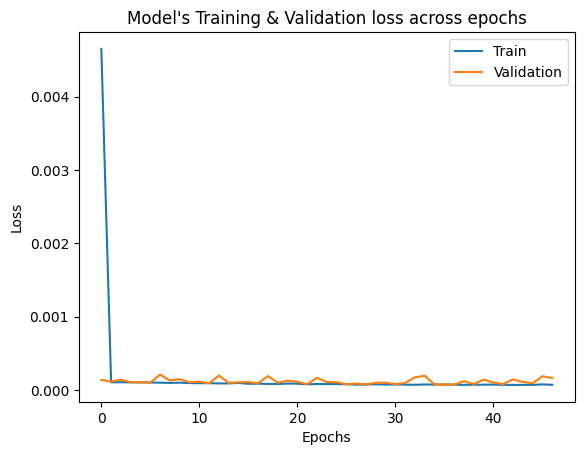

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


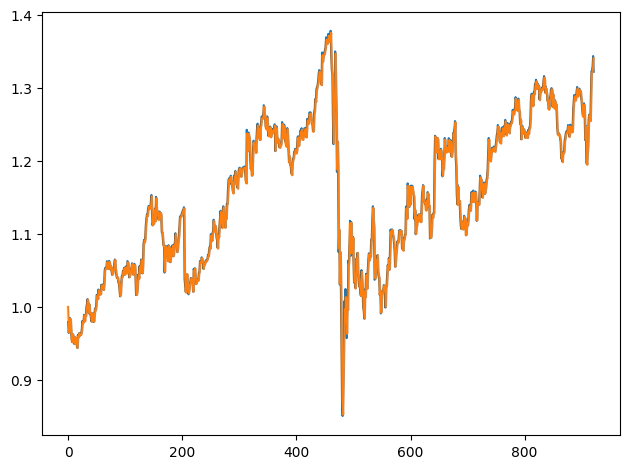

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.00027


In [373]:

plotloss(history)
print_result(model_srnn, 'SimpleRNN U32, Adam', X_test, Y_test, 200)


#### 50 units and early stopping

In [374]:
model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))

model.add(Dense(units = 1, activation='sigmoid')) 

model.compile(optimizer = Adam(learning_rate=0.001), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val),  epochs = 50, batch_size = 32, callbacks=[ history, early_stopping])

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0704 - root_mean_squared_error: 0.1045 - val_loss: 0.0227 - val_mean_absolute_error: 0.1454 - val_root_mean_squared_error: 0.1506
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0010 - mean_absolute_error: 0.0222 - root_mean_squared_error: 0.0316 - val_loss: 0.0114 - val_mean_absolute_error: 0.1016 - val_root_mean_squared_error: 0.1066
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 6.3372e-04 - mean_absolute_error: 0.0177 - root_mean_squared_error: 0.0252 - val_loss: 0.0092 - val_mean_absolute_error: 0.0913 - val_root_mean_squared_error: 0.0959
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.4006e-04 - mean_absolute_error: 0.0162 - root_mean_squared_error: 0.0232 - val_loss: 0.0080 - val_mean_absolute_error: 0.0860 - val_root_mean_squared_error: 0.0897
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 4.5147e-04 - mean_absolute_error: 0.0148 - root_me

In [375]:
model.evaluate(X_test,Y_test)
model.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.2475 - root_mean_squared_error: 0.2551


Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_36 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_37 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_38 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_39 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

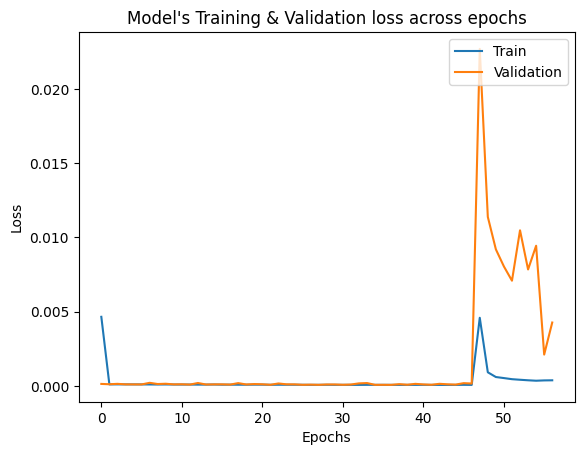

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


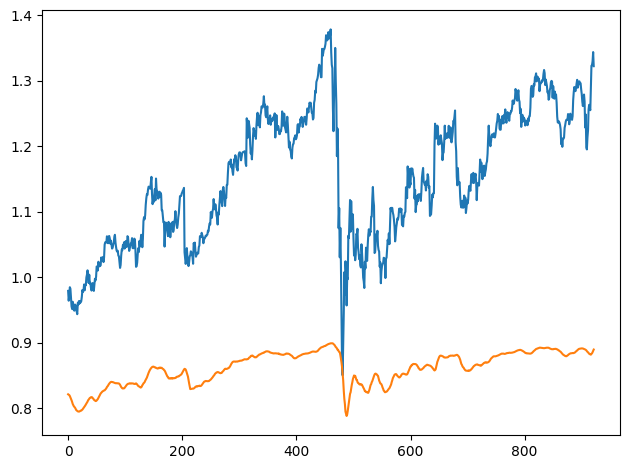

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.00027
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.09048


In [376]:

plotloss(history)
print_result(model, 'SimpleRNN L4 U50, Dropout, Adam ', X_test, Y_test, 200)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0696 - val_loss: 0.0056
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 0.0024


Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_40 (SimpleRNN)       │ (None, 20)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_244 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,193 (28.10 KB)

 Trainable params: 2,397 (9.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,796 (18.74 KB)

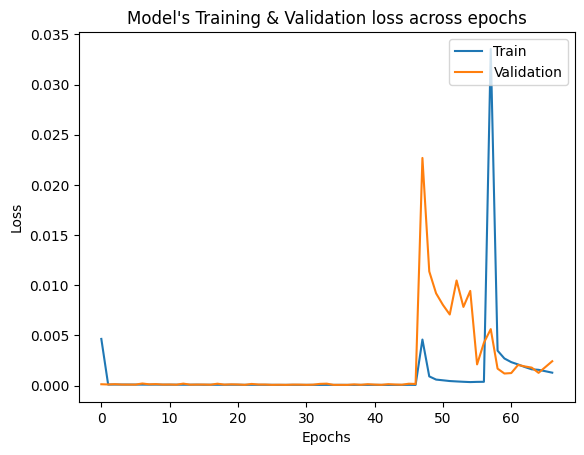

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


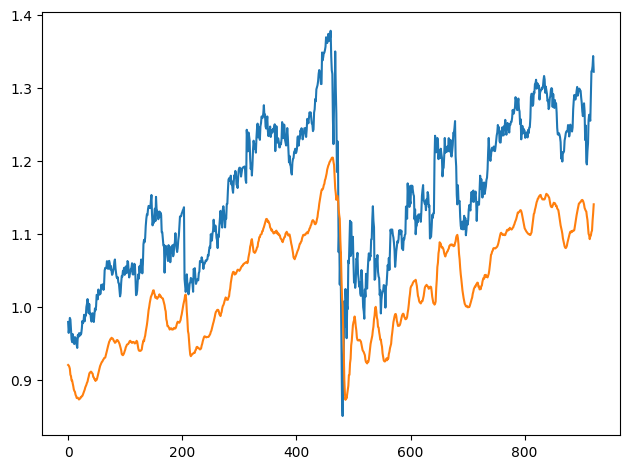

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.00027
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.09048
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.01595


In [377]:
model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv.add(MaxPooling1D(pool_size=2)),
model_conv.add(Dropout(0.2)),
model_conv.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_conv.add(Dense(20, activation='relu'))
model_conv.add(Dense(1))
model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + SimpleRNN U20 dropout  Adam', X_test, Y_test)

### SGD

In [378]:

model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))

model.add(Dense(units = 1, activation='sigmoid')) 

model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 60, batch_size = 32,callbacks=[ history, early_stopping] )


Epoch 1/60


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0463 - mean_absolute_error: 0.1691 - root_mean_squared_error: 0.2119 - val_loss: 0.0218 - val_mean_absolute_error: 0.1319 - val_root_mean_squared_error: 0.1476
Epoch 2/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0043 - mean_absolute_error: 0.0525 - root_mean_squared_error: 0.0653 - val_loss: 0.0186 - val_mean_absolute_error: 0.1207 - val_root_mean_squared_error: 0.1365
Epoch 3/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - mean_absolute_error: 0.0470 - root_mean_squared_error: 0.0581 - val_loss: 0.0193 - val_mean_absolute_error: 0.1244 - val_root_mean_squared_error: 0.1388
Epoch 4/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0437 - root_mean_squared_error: 0.0543 - val_loss: 0.0194 - val_mean_absolute_error: 0.1256 - val_root_mean_squared_error: 0.1393
Epoch 5/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0407 - root_mean_squared_e

In [379]:
model.evaluate(X_test,Y_test)
model.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0858 - mean_absolute_error: 0.2794 - root_mean_squared_error: 0.2887


Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_41 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_42 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_43 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_44 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_245 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

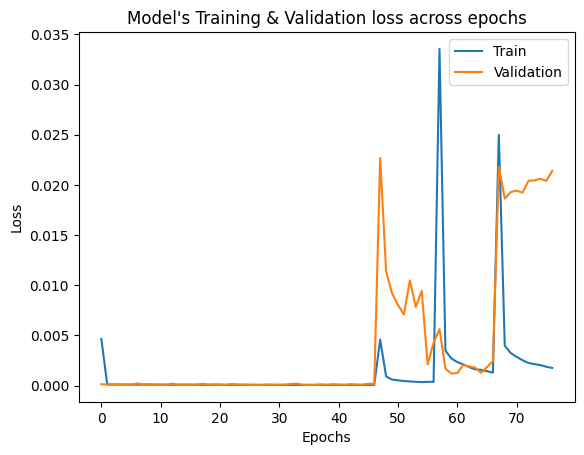

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


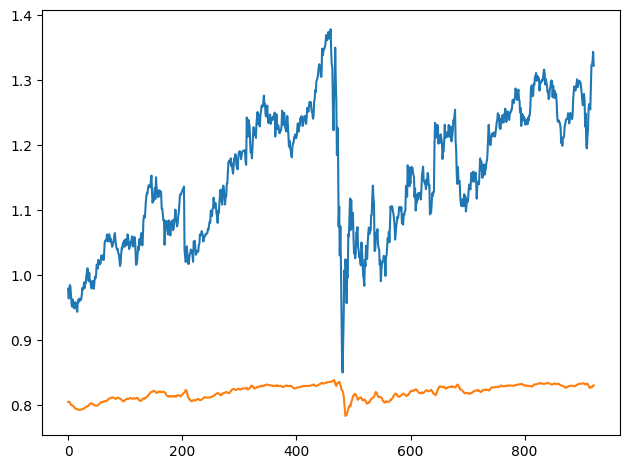

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373


In [380]:
plotloss(history)
print_result(model, 'SimpleRNN U32, Dropout, SGD 0.001', X_test, Y_test, 200)

## LSTM

### Adam

#### LSTM  64

In [381]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0861 - val_loss: 2.3676e-04 - val_mean_absolute_error: 0.0116
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5077e-04 - mean_absolute_error: 0.0102 - val_loss: 3.1848e-04 - val_mean_absolute_error: 0.0144
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2098e-04 - mean_absolute_error: 0.0094 - val_loss: 5.5662e-04 - val_mean_absolute_error: 0.0200
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2083e-04 - mean_absolute_error: 0.0091 - val_loss: 4.4953e-04 - val_mean_absolute_error: 0.0177
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2278e-04 - mean_absolute_error: 0.0092 - val_loss: 2.2464e-04 - val_mean_absolute_error: 0.0114
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0940e-04 - mean_absolute_error: 0.0089 - val_loss: 7.9696e-04 - val_mean_absolute_error: 0.0250
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1764e

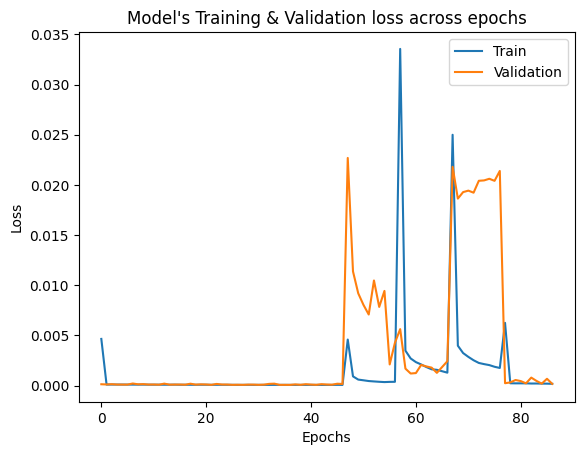

20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


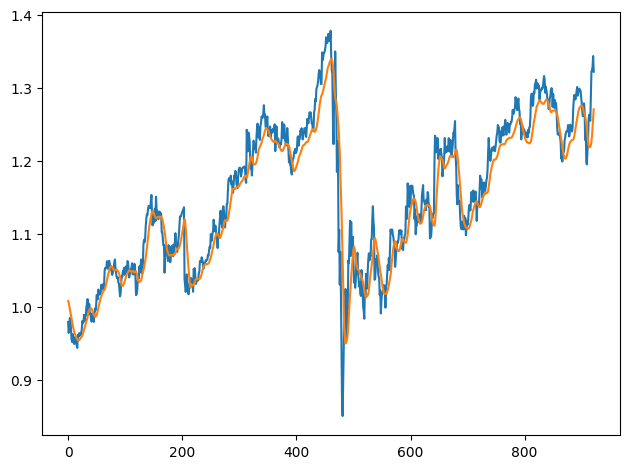

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056


In [382]:
plotloss(history)

print_result(model, 'LSTM U64, Adam', X_test, Y_test)


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2117 - mean_absolute_error: 0.3866 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2172 - mean_absolute_error: 0.3940 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2160 - mean_absolute_error: 0.3929 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2181 - mean_absolute_error: 0.3936 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2116 - mean_absolute_error: 0.3867 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2171 - mean_absolute_error: 0.3917 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2135 - mean_absolute_error: 0.3884 - val_loss: 0.

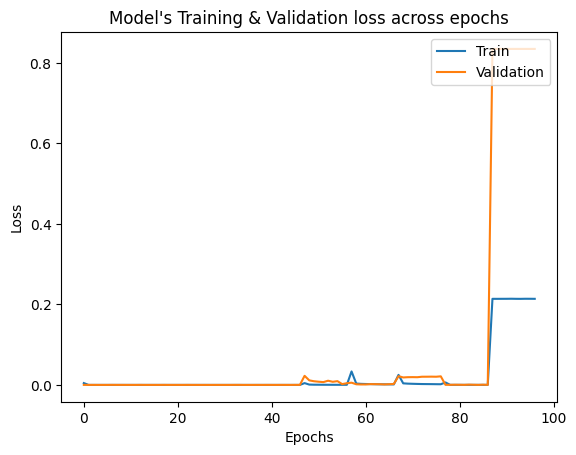

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


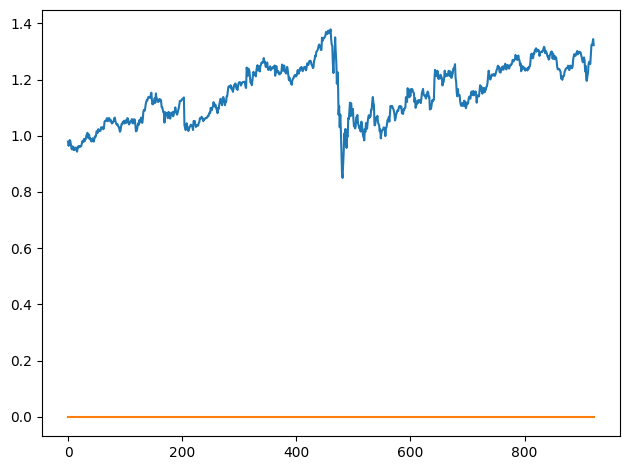

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988


In [383]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="relu"))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'LSTM U64, fully connected, Adam', X_test, Y_test)


#### LSTM 2 layers 64,32

In [384]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(32, return_sequences = False))
regressorLSTM.add(Dense(32, activation="relu"))
regressorLSTM.add(Dense(1,activation="sigmoid"))
regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0243 - mean_absolute_error: 0.0973 - val_loss: 0.0148 - val_mean_absolute_error: 0.1086
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 6.5348e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0049 - val_mean_absolute_error: 0.0567
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.4706e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0042 - val_mean_absolute_error: 0.0526
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.2508e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0031 - val_mean_absolute_error: 0.0434
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.8011e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0023 - val_mean_absolute_error: 0.0359
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.7330e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0023 - val_mean_absolute_error: 0.0356
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.5905e-04 - mean_absolute

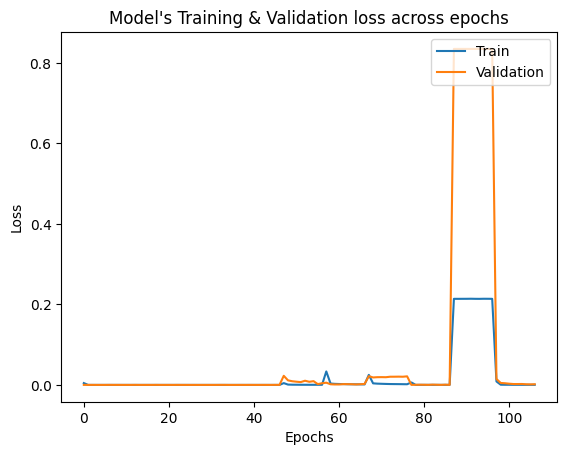

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


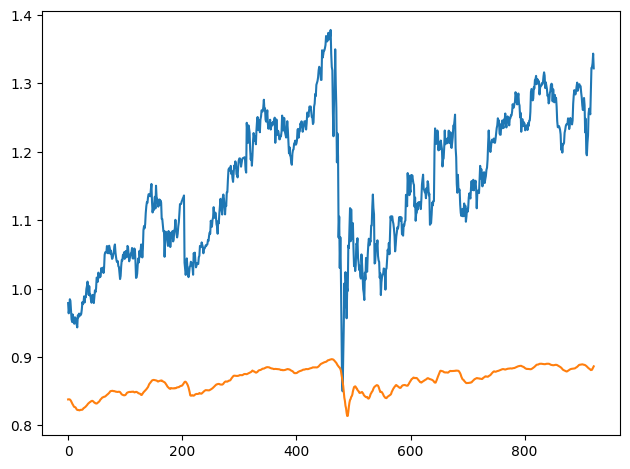

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551


In [385]:

plotloss(history)
print_result(regressorLSTM, 'LSTM L2 U64,32  Adam', X_test, Y_test)


In [386]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_131 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_132 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,205 (356.27 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,804 (237.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0630 - mean_absolute_error: 0.2377


#### LSTM 32,16

In [387]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(16, return_sequences = False))
regressorLSTM.add(Dense(1,activation="sigmoid"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error"])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=16, callbacks=[history, early_stopping])



Epoch 1/200


407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0190 - mean_absolute_error: 0.0824 - val_loss: 0.0090 - val_mean_absolute_error: 0.0796
Epoch 2/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.3913e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0042 - val_mean_absolute_error: 0.0515
Epoch 3/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.3341e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0042 - val_mean_absolute_error: 0.0522
Epoch 4/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.7744e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0031 - val_mean_absolute_error: 0.0437
Epoch 5/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.7001e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0034 - val_mean_absolute_error: 0.0483
Epoch 6/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.0487e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0024 - val_mean_absolute_error: 0.0375
Epoch 7/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.0327e-04 - mean_absolut

In [388]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.2090


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_133 (LSTM)                 │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_134 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

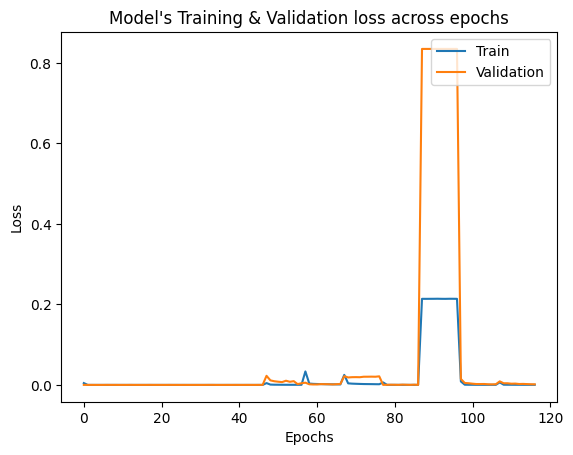

16/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


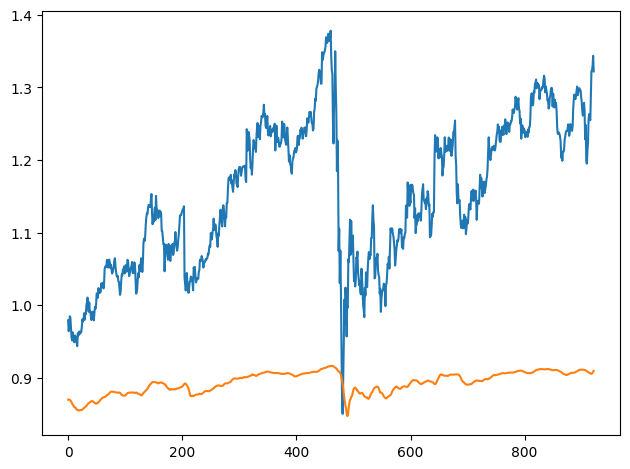

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491


In [389]:

plotloss(history)
print_result(regressorLSTM, 'LSTM U32, 16, Dropout, Adam ', X_test, Y_test)



#### LSTM 4 layers 50 units dropout

In [390]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=1,activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])


Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0108 - mean_absolute_error: 0.0501 - val_loss: 0.0063 - val_mean_absolute_error: 0.0747
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 6.2991e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0060 - val_mean_absolute_error: 0.0733
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 5.9451e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0012 - val_mean_absolute_error: 0.0295
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 5.5710e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0036 - val_mean_absolute_error: 0.0556
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5.4487e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0013 - val_mean_absolute_error: 0.0306
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 4.9571e-04 - mean_absolute_error: 0.0151 - val_loss: 7.9476e-04 - val_mean_absolute_error: 0.0239
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 4.7352e-04 - 

In [391]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.1265


Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_135 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_136 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_137 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_138 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

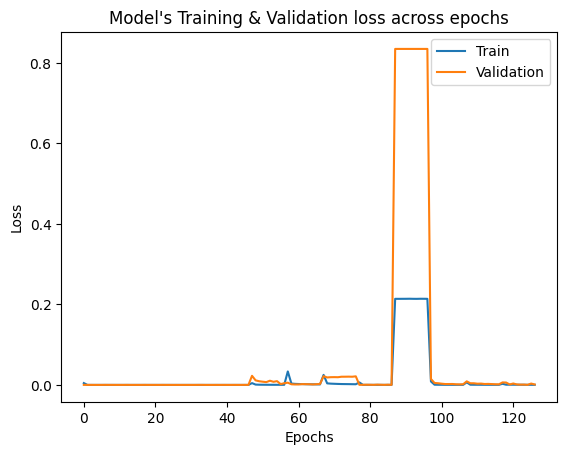

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


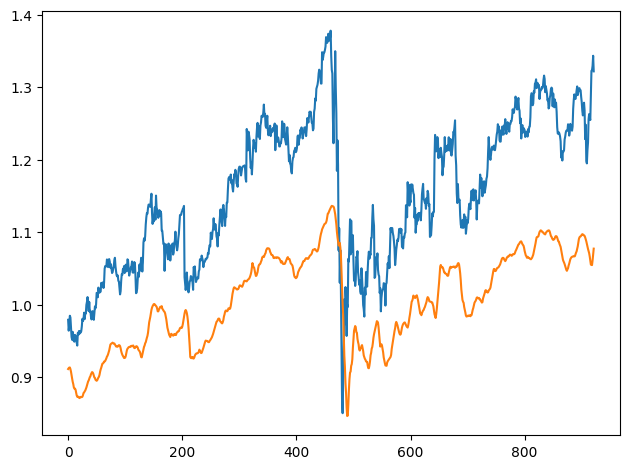

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633


In [392]:

plotloss(history)
print_result(regressorLSTM, 'LSTM L4 U50, dropout, Adam', X_test, Y_test)


### Adamax

#### 64 units

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0213 - mean_absolute_error: 0.0856 - val_loss: 6.3120e-04 - val_mean_absolute_error: 0.0202
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6808e-04 - mean_absolute_error: 0.0117 - val_loss: 3.5249e-04 - val_mean_absolute_error: 0.0143
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4479e-04 - mean_absolute_error: 0.0108 - val_loss: 2.8927e-04 - val_mean_absolute_error: 0.0128
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2212e-04 - mean_absolute_error: 0.0100 - val_loss: 2.4263e-04 - val_mean_absolute_error: 0.0121
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4051e-04 - mean_absolute_error: 0.0098 - val_loss: 2.4236e-04 - val_mean_absolute_error: 0.0120
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4149e-04 - mean_absolute_error: 0.0095 - val_loss: 2.3649e-04 - val_mean_absolute_error: 0.0117
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0896e

Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_139 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0307


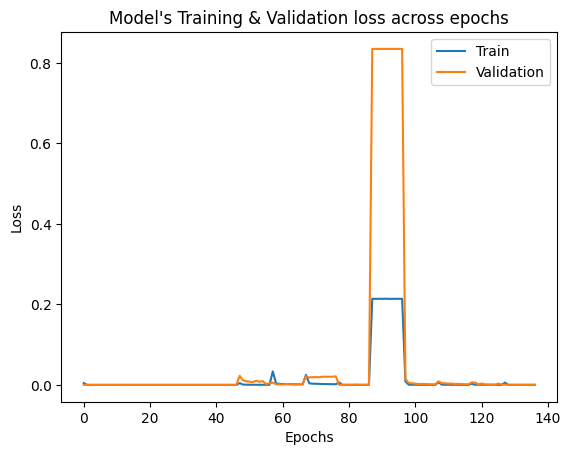

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


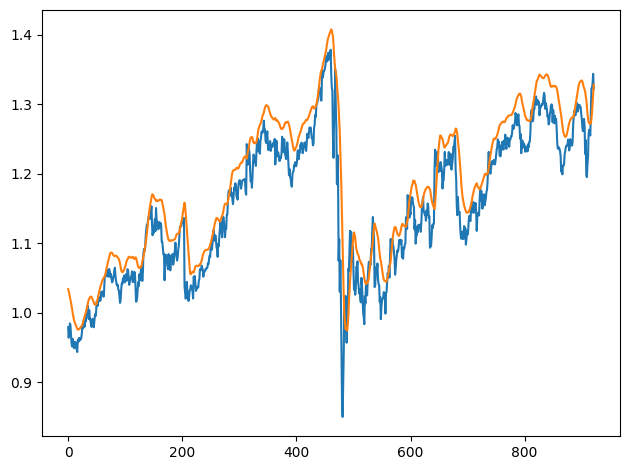

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [393]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM U64 Adamax', X_test, Y_test)

#### lstm 2 layers 64,32 units, dropout

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0317 - mean_absolute_error: 0.1112 - val_loss: 9.8519e-04 - val_mean_absolute_error: 0.0279
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0310 - val_loss: 0.0015 - val_mean_absolute_error: 0.0353
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0270 - val_loss: 0.0019 - val_mean_absolute_error: 0.0407
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0255 - val_loss: 0.0022 - val_mean_absolute_error: 0.0442
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0013 - mean_absolute_error: 0.0249 - val_loss: 0.0043 - val_mean_absolute_error: 0.0628
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012 - mean_absolute_error: 0.0235 - val_loss: 0.0034 - val_mean_absolute_error: 0.0548
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0010 - mean_absolute_error: 0.0221 - v

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_140 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_141 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_104 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mean_absolute_error: 0.0424    


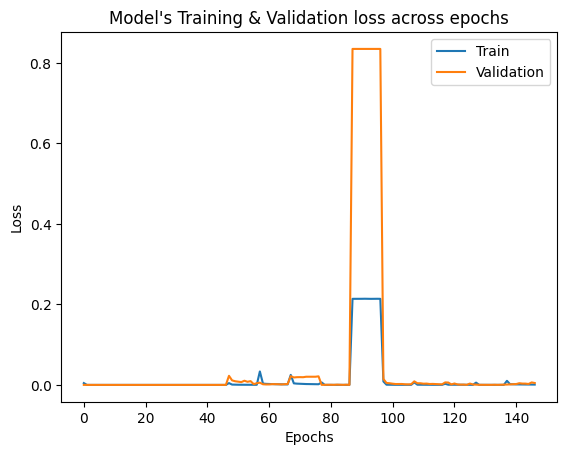

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


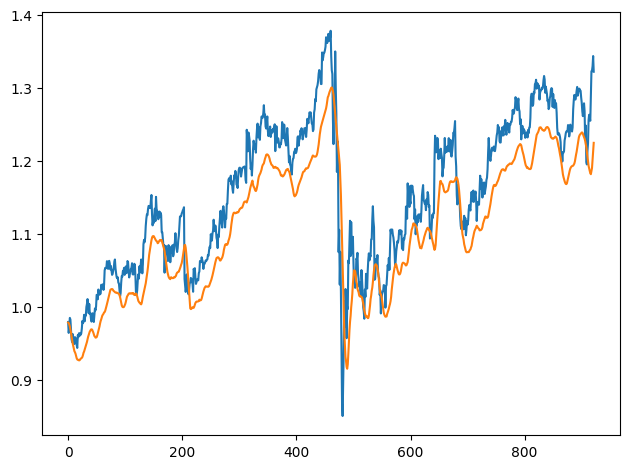

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [394]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adamax ', X_test, Y_test)

### Adagrad

#### LSTM 2 layers 50units dropout

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2132 - mean_absolute_error: 0.3890 - val_loss: 0.6990 - val_mean_absolute_error: 0.8306
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1399 - mean_absolute_error: 0.3068 - val_loss: 0.4803 - val_mean_absolute_error: 0.6872
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0883 - mean_absolute_error: 0.2498 - val_loss: 0.3401 - val_mean_absolute_error: 0.5770
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0572 - mean_absolute_error: 0.2079 - val_loss: 0.2447 - val_mean_absolute_error: 0.4880
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0435 - mean_absolute_error: 0.1859 - val_loss: 0.1858 - val_mean_absolute_error: 0.4242
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0368 - mean_absolute_error: 0.1706 - val_loss: 0.1501 - val_mean_absolute_error: 0.3804
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0315 - mean_absolute_error: 0.1549 - val_l

Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_142 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_143 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_106 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_258 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,804 (249.24 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,903 (124.62 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0436 - mean_absolute_error: 1.0167


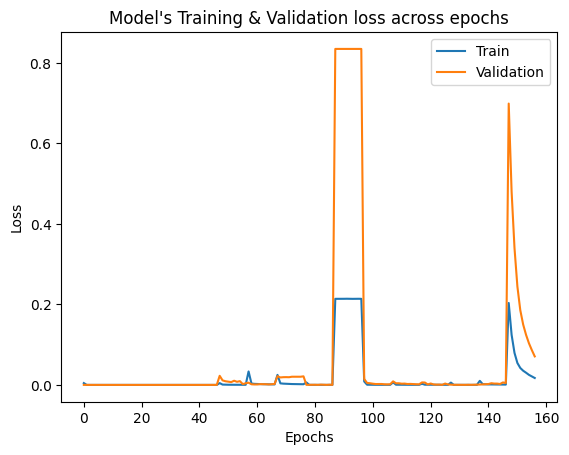

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


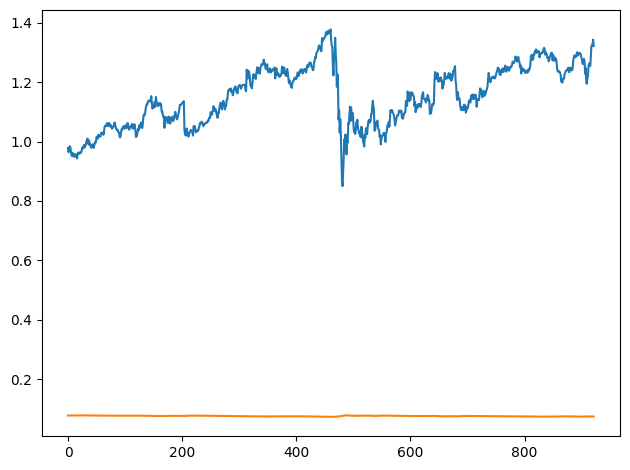

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [395]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adagrad(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adagrad ', X_test, Y_test)

### Adadelta

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1931 - mean_absolute_error: 0.3686 - val_loss: 0.7529 - val_mean_absolute_error: 0.8629
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1854 - mean_absolute_error: 0.3611 - val_loss: 0.7211 - val_mean_absolute_error: 0.8444
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1757 - mean_absolute_error: 0.3479 - val_loss: 0.6867 - val_mean_absolute_error: 0.8239
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1718 - mean_absolute_error: 0.3454 - val_loss: 0.6493 - val_mean_absolute_error: 0.8011
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1557 - mean_absolute_error: 0.3251 - val_loss: 0.6109 - val_mean_absolute_error: 0.7769
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1464 - mean_absolute_error: 0.3153 - val_loss: 0.5722 - val_mean_absolute_error: 0.7518
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1350 - mean_absolute_error: 0.3017 - val_loss:

Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_145 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0931 - mean_absolute_error: 1.0411


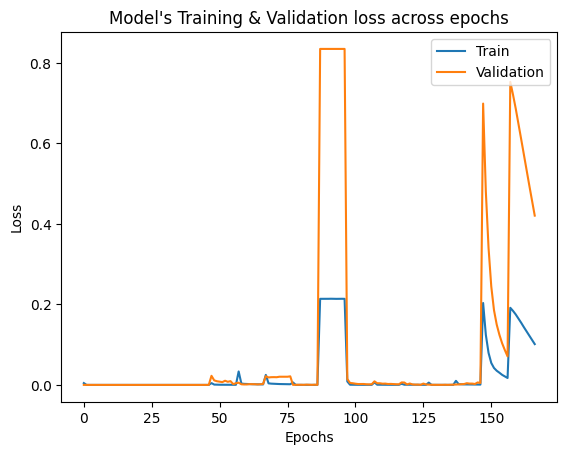

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


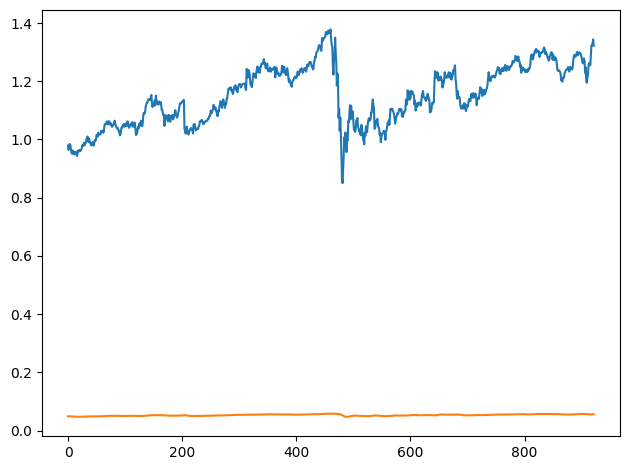

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [396]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adadelta(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adadelta ', X_test, Y_test)

### Custom loss 

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - val_loss: 0.0495 - val_mean_absolute_error: 0.0495
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0499 - val_mean_absolute_error: 0.0499
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0791 - val_mean_absolute_error: 0.0791
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.0495 - val_mean_absolute_error: 0.0495
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.0525 - val_mean_absolute_error: 0.0525
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - val_loss:

Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_146 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_147 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231


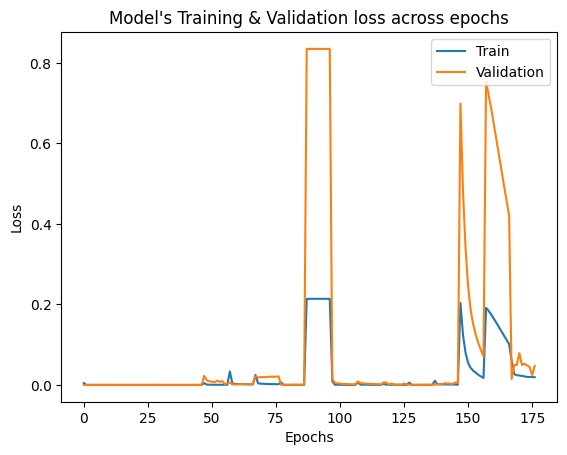

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


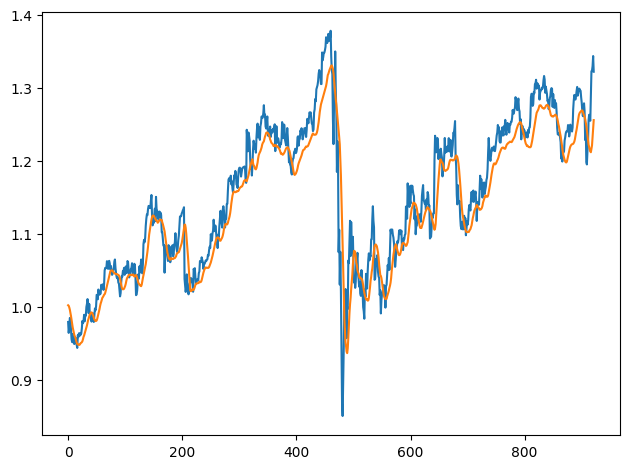

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [397]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss=custom_loss,  optimizer=Adamax(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout custom loss Adamax', X_test, Y_test)


Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - val_loss: 0.0156 - val_mean_absolute_error: 0.0156
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - v

Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_156 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_295 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342 - mean_absolute_error: 0.0342


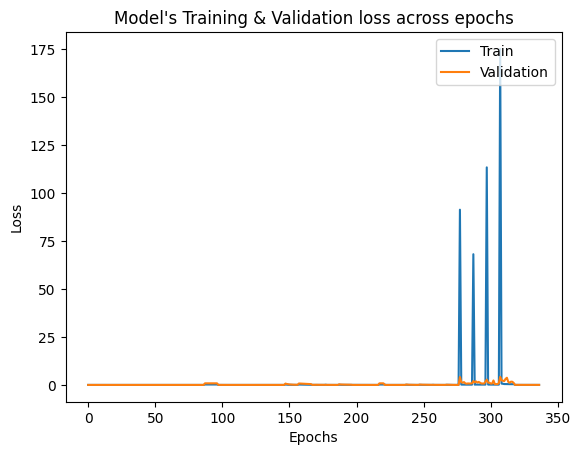

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


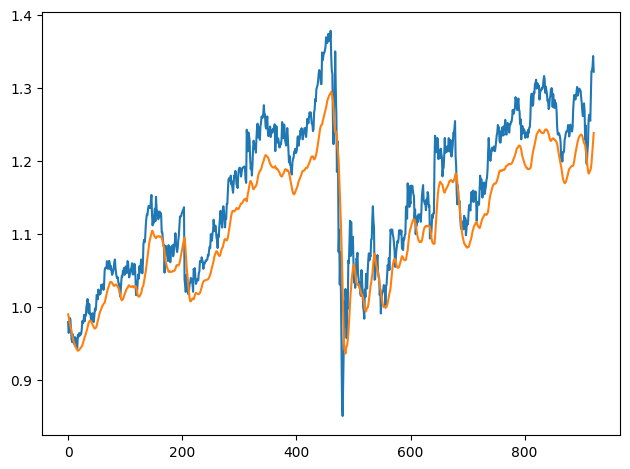

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [426]:


model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,activation="relu"))
model.compile(loss=custom_loss,  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])

model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM U64, custom loss Adam', X_test, Y_test)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1698 - val_loss: 0.0570
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.8389e-04 - val_loss: 0.0022


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_148 (LSTM)                 │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_149 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,477 (185.46 KB)

 Trainable params: 15,825 (61.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,652 (123.64 KB)

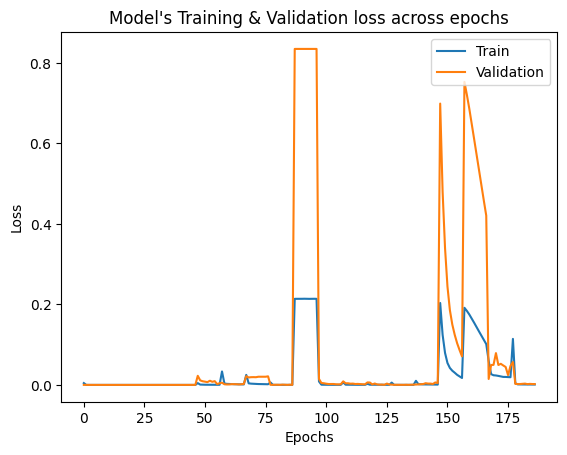

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


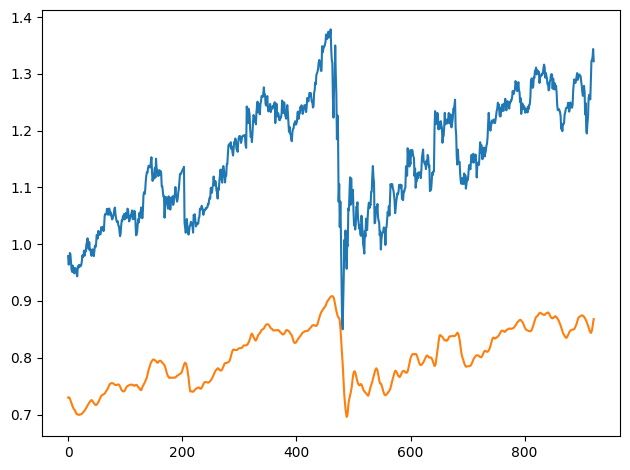

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [398]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(Dropout(0.2))
model_conv.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_conv.add(LSTM(16, return_sequences=False))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + LSTM L2 U32,16, dropout  Adam', X_test, Y_test)

### SGD

#### LSTM 2 layers 64,32 Dropout


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1383 - mean_absolute_error: 0.3074 - val_loss: 0.3235 - val_mean_absolute_error: 0.5626
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0546 - mean_absolute_error: 0.2089 - val_loss: 0.2181 - val_mean_absolute_error: 0.4601
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0440 - mean_absolute_error: 0.1880 - val_loss: 0.1829 - val_mean_absolute_error: 0.4206
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0408 - mean_absolute_error: 0.1789 - val_loss: 0.1656 - val_mean_absolute_error: 0.3999
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.1731 - val_loss: 0.1532 - val_mean_absolute_error: 0.3846
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0359 - mean_absolute_error: 0.1663 - val_loss: 0.1437 - val_mean_absolute_error: 0.3726
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0333 - mean_absolute_error: 0.1601 - val_loss

Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_150 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_151 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_264 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_265 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5370 - mean_absolute_error: 0.7273


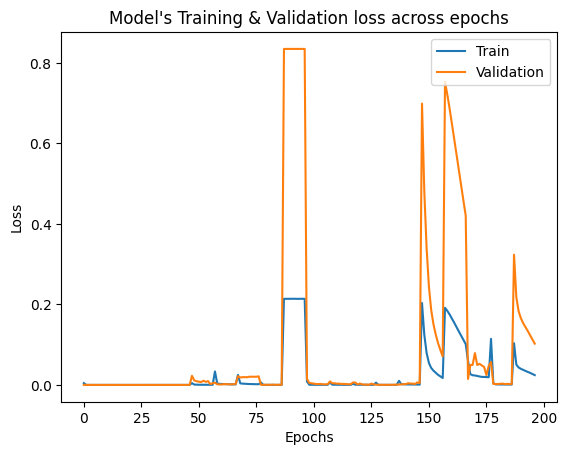

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


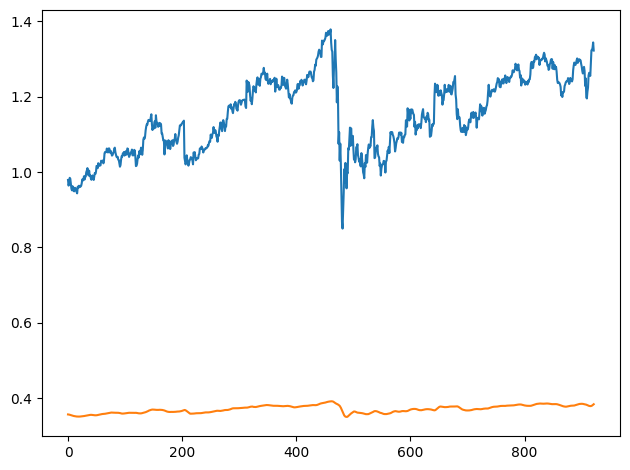

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [399]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=SGD(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, 32, dropout SGD ', X_test, Y_test)



## GRU

### Adam

### 4 layers 50 units and dropout

In [400]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=16, callbacks=[history, early_stopping])



Epoch 1/200


407/407 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0477 - val_loss: 6.3097e-04 - val_mean_absolute_error: 0.0211
Epoch 2/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 4.7722e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0018 - val_mean_absolute_error: 0.0392
Epoch 3/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 4.5710e-04 - mean_absolute_error: 0.0148 - val_loss: 6.0131e-04 - val_mean_absolute_error: 0.0212
Epoch 4/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 3.8658e-04 - mean_absolute_error: 0.0140 - val_loss: 2.1450e-04 - val_mean_absolute_error: 0.0117
Epoch 5/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 3.2268e-04 - mean_absolute_error: 0.0125 - val_loss: 3.4714e-04 - val_mean_absolute_error: 0.0158
Epoch 6/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 3.0140e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0012 - val_mean_absolute_error: 0.0322
Epoch 7/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss:

In [401]:
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_66 (GRU)                    │ (None, 10, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_67 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_68 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_69 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_266 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0447  


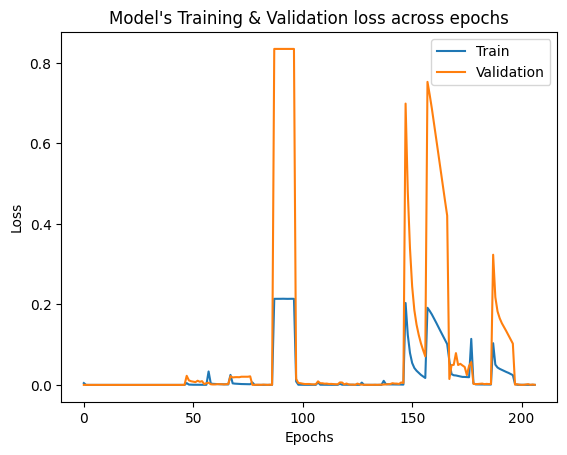

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


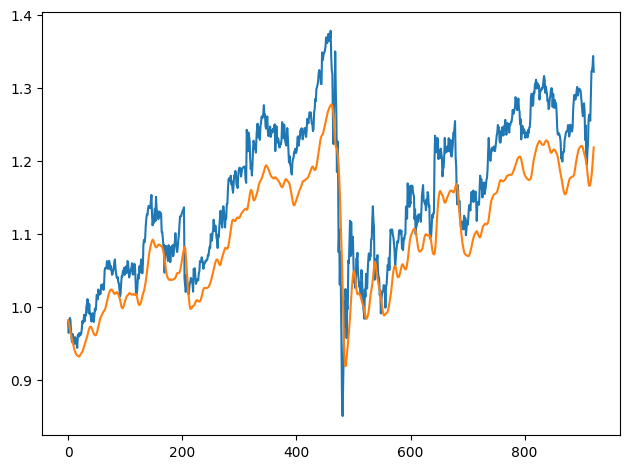

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [402]:

plotloss(history)

print_result(regressorGRU, 'GRU L4 U50, Adam ', X_test, Y_test)


### GRU 2 layers 64,16

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0755 - val_loss: 6.1444e-04 - val_mean_absolute_error: 0.0216
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0385 - val_loss: 3.7277e-04 - val_mean_absolute_error: 0.0159
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0319 - val_loss: 0.0013 - val_mean_absolute_error: 0.0333
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0015 - mean_absolute_error: 0.0282 - val_loss: 0.0012 - val_mean_absolute_error: 0.0319
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0271 - val_loss: 2.1785e-04 - val_mean_absolute_error: 0.0118
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mean_absolute_error: 0.0255 - val_loss: 2.3685e-04 - val_mean_absolute_error: 0.0125
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mean_absolute_error:

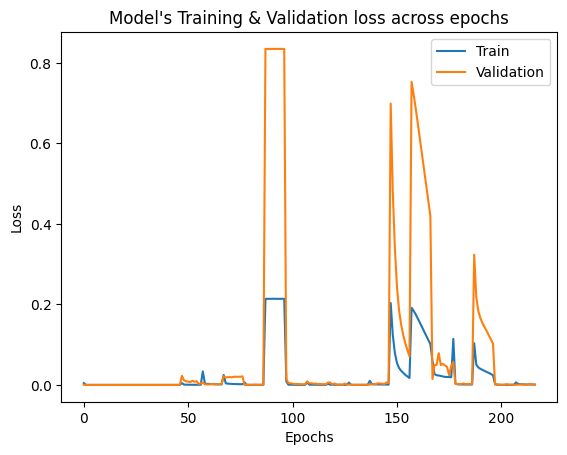

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


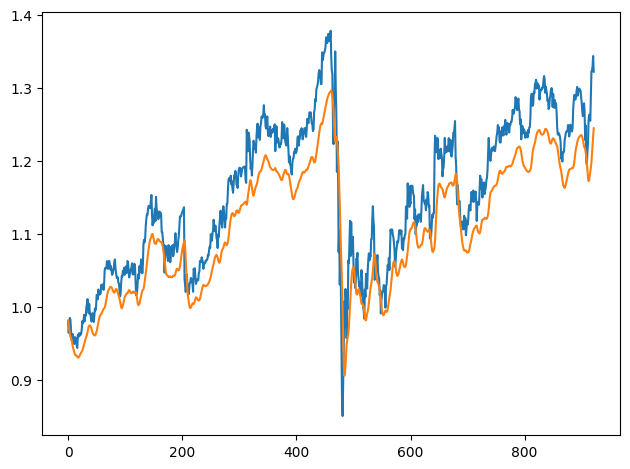

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [403]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,16, dropout, Adam', X_test, Y_test)

### Adamax 

Epoch 1/200


102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.2133 - mean_absolute_error: 0.3874 - val_loss: 0.8348 - val_mean_absolute_error: 0.9088
Epoch 2/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2152 - mean_absolute_error: 0.3900 - val_loss: 0.8348 - val_mean_absolute_error: 0.9088
Epoch 3/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2127 - mean_absolute_error: 0.3875 - val_loss: 0.8348 - val_mean_absolute_error: 0.9088
Epoch 4/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2107 - mean_absolute_error: 0.3845 - val_loss: 0.8348 - val_mean_absolute_error: 0.9088
Epoch 5/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2125 - mean_absolute_error: 0.3872 - val_loss: 0.0012 - val_mean_absolute_error: 0.0291
Epoch 6/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0120 - mean_absolute_error: 0.0824 - val_loss: 7.3922e-04 - val_mean_absolute_error: 0.0231
Epoch 7/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3523e-04 - mean_absolute_error:

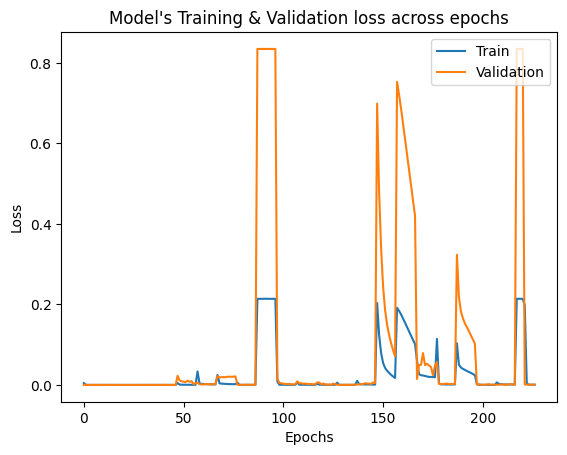

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


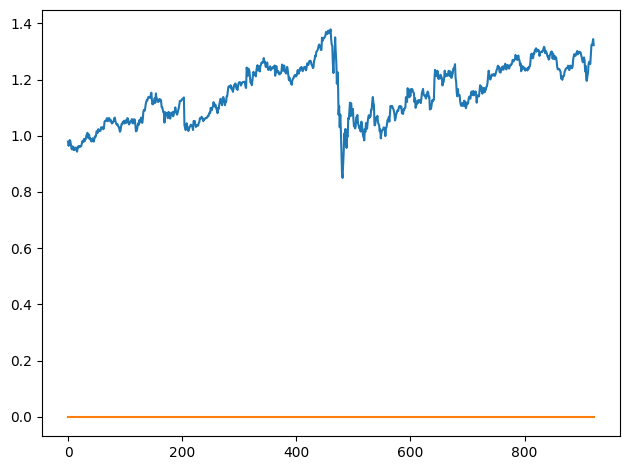

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [404]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L4 U50, Dropout, Adamax ', X_test, Y_test)

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0390 - mean_absolute_error: 0.1266 - val_loss: 2.5816e-04 - val_mean_absolute_error: 0.0131
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0388 - val_loss: 4.6935e-04 - val_mean_absolute_error: 0.0181
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0027 - mean_absolute_error: 0.0367 - val_loss: 2.5286e-04 - val_mean_absolute_error: 0.0130
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0353 - val_loss: 0.0020 - val_mean_absolute_error: 0.0421
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0023 - mean_absolute_error: 0.0336 - val_loss: 3.2481e-04 - val_mean_absolute_error: 0.0150
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0022 - mean_absolute_error: 0.0325 - val_loss: 0.0011 - val_mean_absolute_error: 0.0307
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0021 - mean_absolute

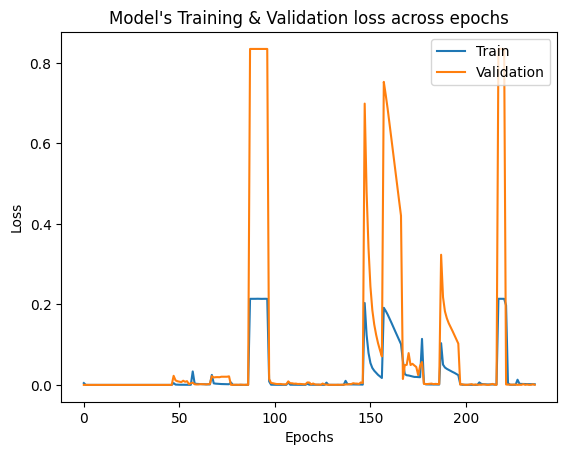

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


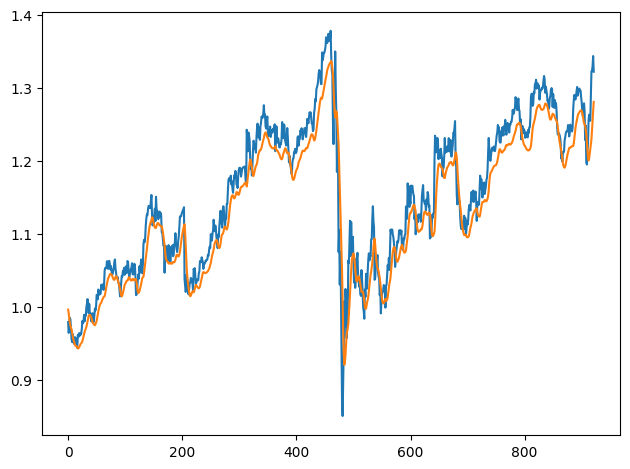

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [405]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64, 32 dropout, Adamax', X_test, Y_test)

### Adagrad

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1475 - mean_absolute_error: 0.3163 - val_loss: 0.2080 - val_mean_absolute_error: 0.4494
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0431 - mean_absolute_error: 0.1790 - val_loss: 0.1296 - val_mean_absolute_error: 0.3538
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0320 - mean_absolute_error: 0.1517 - val_loss: 0.0952 - val_mean_absolute_error: 0.3029
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0242 - mean_absolute_error: 0.1308 - val_loss: 0.0688 - val_mean_absolute_error: 0.2573
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0182 - mean_absolute_error: 0.1128 - val_loss: 0.0517 - val_mean_absolute_error: 0.2231
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0145 - mean_absolute_error: 0.1000 - val_loss: 0.0376 - val_mean_absolute_error: 0.1901
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0115 - mean_absolute_error: 0.0881 -

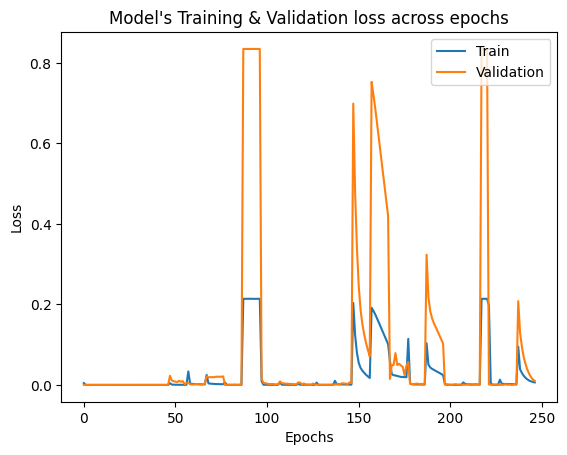

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


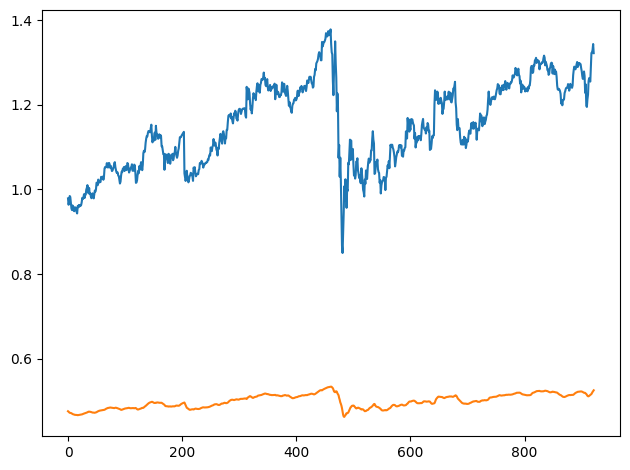

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [406]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adagrad(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32 dropout, Adagrad', X_test, Y_test)

### SDG

In [407]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=SGD(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0987 - mean_absolute_error: 0.2567 - val_loss: 0.1840 - val_mean_absolute_error: 0.4231
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0360 - mean_absolute_error: 0.1646 - val_loss: 0.1295 - val_mean_absolute_error: 0.3538
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0317 - mean_absolute_error: 0.1518 - val_loss: 0.1112 - val_mean_absolute_error: 0.3278
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0285 - mean_absolute_error: 0.1430 - val_loss: 0.0936 - val_mean_absolute_error: 0.3006
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0252 - mean_absolute_error: 0.1343 - val_loss: 0.0795 - val_mean_absolute_error: 0.2769
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0213 - mean_absolute_error: 0.1230 - val_loss: 0.0706 - val_mean_absolute_error: 0.2610
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0185 - mean_absolute_error: 0.1143 -

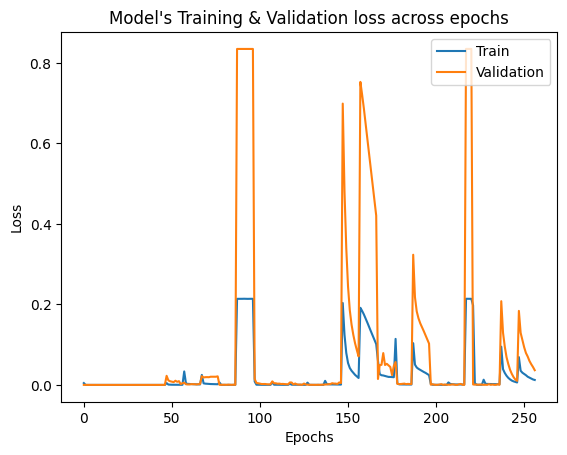

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


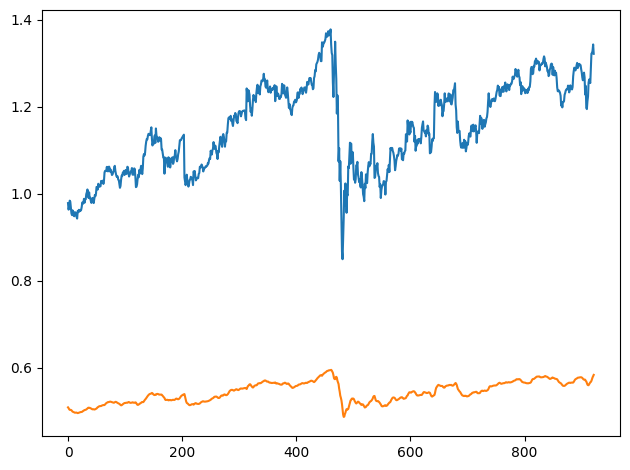

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [408]:

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32 dropout, SGD', X_test, Y_test)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1357 - val_loss: 0.0312
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0030


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_82 (GRU)                    │ (None, 1, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_83 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_272 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,973 (406.15 KB)

 Trainable params: 34,657 (135.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,316 (270.77 KB)

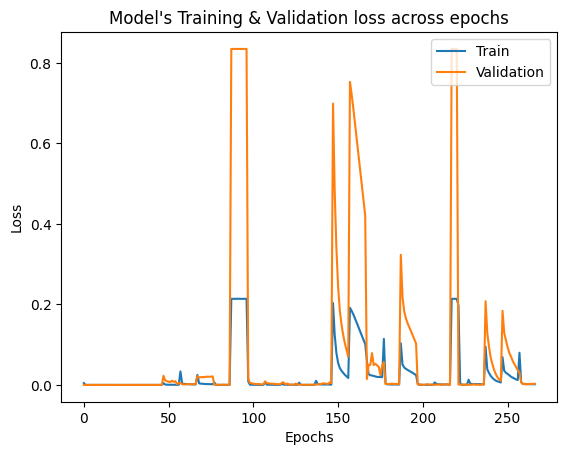

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


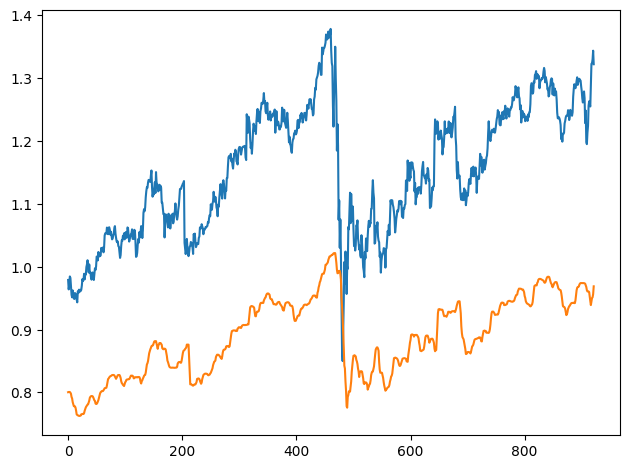

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [409]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=5))
model_conv.add(Dropout(0.2))
model_conv.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
model_conv.add(GRU(units=32,activation='tanh'))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + GRU L2 U64,32, dropout, Adam', X_test, Y_test)

### custom loss

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - val_loss: 0.0367 - val_mean_absolute_error: 0.0366
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0209 - val_mean_absolute_error: 0.0208
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - val_loss: 0.0693 - val_mean_absolute_error: 0.0692
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - val_loss: 0.0430 - val_mean_absolute_error: 0.0429
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0221 - val_mean_absolute_error: 0.0220
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - val_l

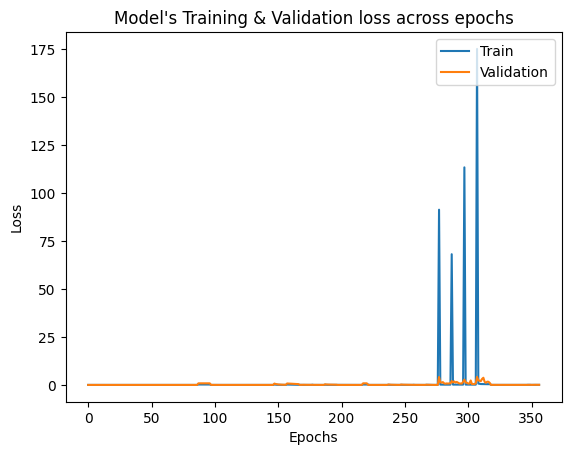

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


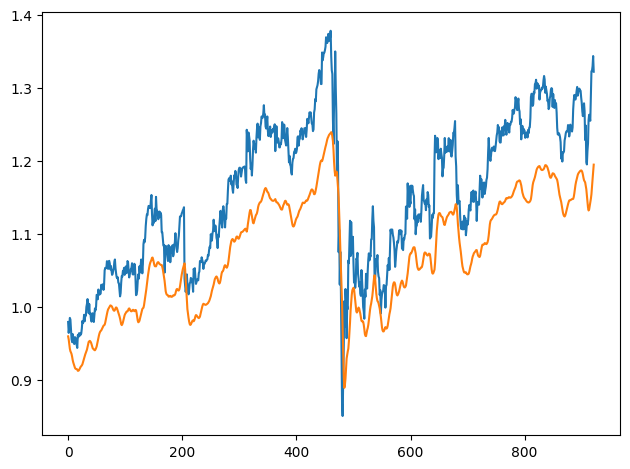

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [429]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = custom_loss)
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32, Dropout, custom loss, Adam ', X_test, Y_test)

## Fully connected

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0695 - val_loss: 0.1120
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0557 - val_loss: 0.0800
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0389 - val_loss: 0.0466
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0249 - val_loss: 0.0246
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 8/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 9/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 10/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0034


Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_273 (Dense)               │ (None, 10, 12)         │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (None, 10, 8)          │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_275 (Dense)               │ (None, 10, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413 (1.62 KB)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276 (1.08 KB)

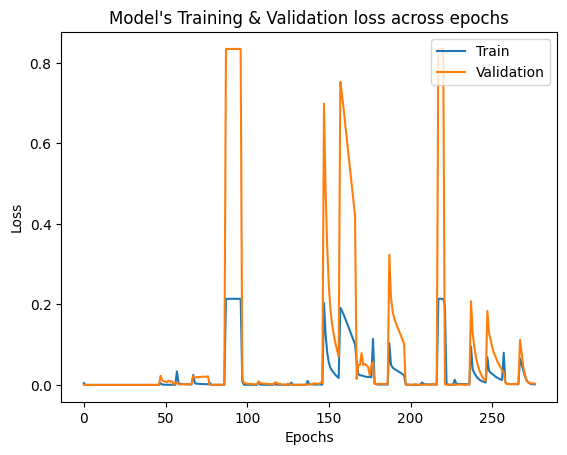

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2389 


0.2909512221813202

In [410]:

model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])


model.summary()

plotloss(history)

accuracy = model.evaluate(X_test, Y_test)

accuracy


# drugi nacin

In [411]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [412]:
data

,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [413]:
data2 = data.copy()
data2

,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [414]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(data, '1985-01-07', '2021-12-17', n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1985-01-07,1.289063,1.302083,1.299479,1.307292
1,1985-01-08,1.302083,1.299479,1.307292,1.309896
2,1985-01-09,1.299479,1.307292,1.309896,1.328125
3,1985-01-10,1.307292,1.309896,1.328125,1.341146
4,1985-01-11,1.309896,1.328125,1.341146,1.335938
...,...,...,...,...,...
9310,2021-12-13,55.000000,54.860001,56.279999,57.759998
9311,2021-12-14,54.860001,56.279999,57.759998,57.799999
9312,2021-12-15,56.279999,57.759998,57.799999,58.060001
9313,2021-12-16,57.759998,57.799999,58.060001,58.650002


## Priprema podataka

In [415]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9315,), (9315, 3, 1), (9315,))

In [416]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

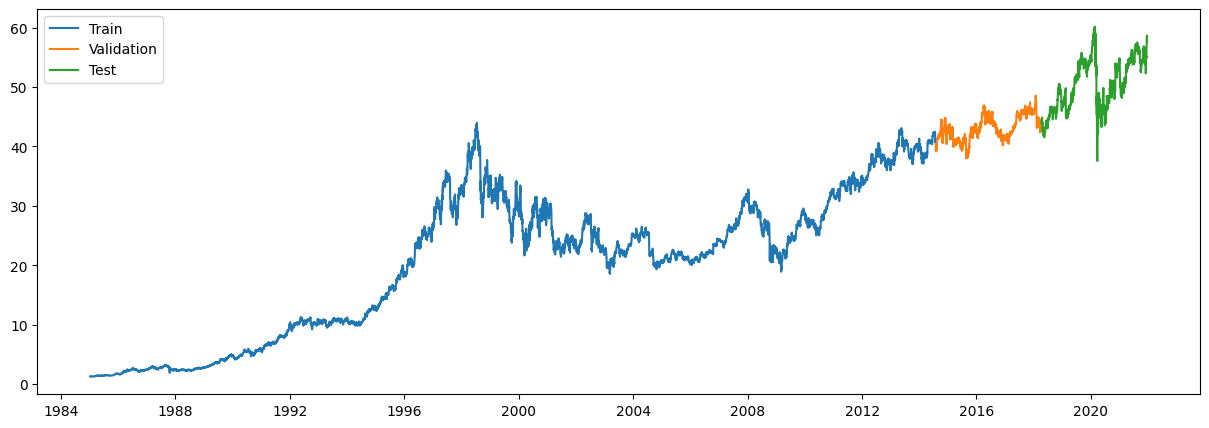

In [417]:
plt.figure(figsize=(15,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

## Modeli

### lstm

Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 245.5921 - mean_absolute_error: 10.4427 - val_loss: 4.1172 - val_mean_absolute_error: 1.7600
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1690 - mean_absolute_error: 0.2736 - val_loss: 1.4409 - val_mean_absolute_error: 0.9168
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1521 - mean_absolute_error: 0.2540 - val_loss: 1.1755 - val_mean_absolute_error: 0.8356
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1401 - mean_absolute_error: 0.2438 - val_loss: 1.4793 - val_mean_absolute_error: 1.0297
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1519 - mean_absolute_error: 0.2502 - val_loss: 0.8198 - val_mean_absolute_error: 0.6887
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1467 - mean_absolute_error: 0.2488 - val_loss: 0.6267 - val_mean_absolute_error: 0.6010
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1525 - mean_absolute_error: 0.2526 

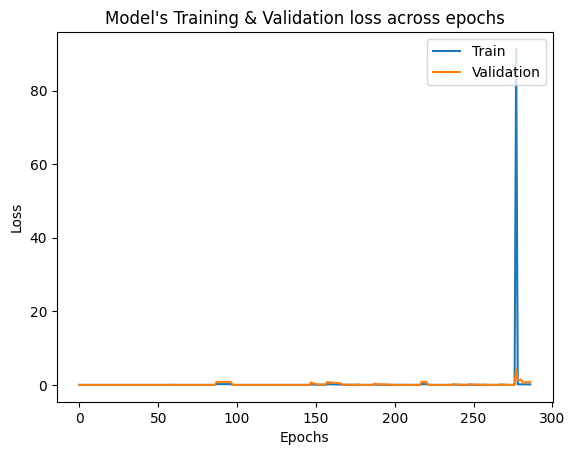

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


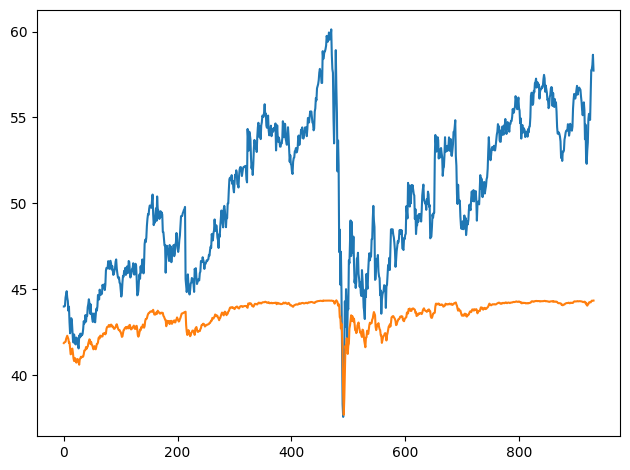

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [418]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'Data 2, LSTM U64, fully connected, Adam', X_test_1, y_test_1)


### GRU 128,64

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 194.5802 - mean_absolute_error: 8.9446 - val_loss: 2.0216 - val_mean_absolute_error: 1.0900
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1481 - mean_absolute_error: 0.2536 - val_loss: 1.2747 - val_mean_absolute_error: 0.8380
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1657 - mean_absolute_error: 0.2756 - val_loss: 1.8251 - val_mean_absolute_error: 1.0870
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1412 - mean_absolute_error: 0.2507 - val_loss: 1.2461 - val_mean_absolute_error: 0.8413
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1740 - mean_absolute_error: 0.2734 - val_loss: 1.5641 - val_mean_absolute_error: 1.0099
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1740 - mean_absolute_error: 0.2791 - val_loss: 1.1450 - val_mean_absolute_error: 0.8119
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1645 - mean_absolute_error: 0.2729 - val_los

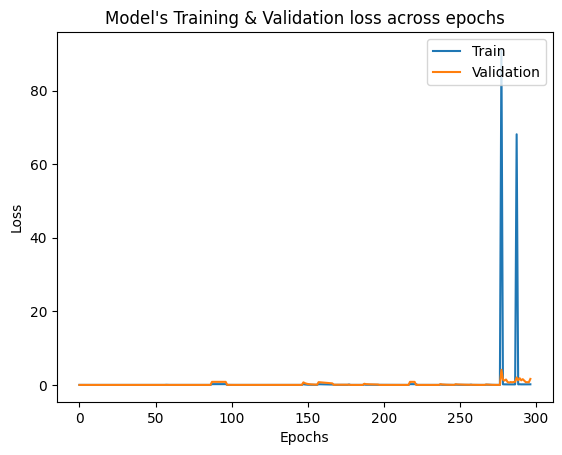

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


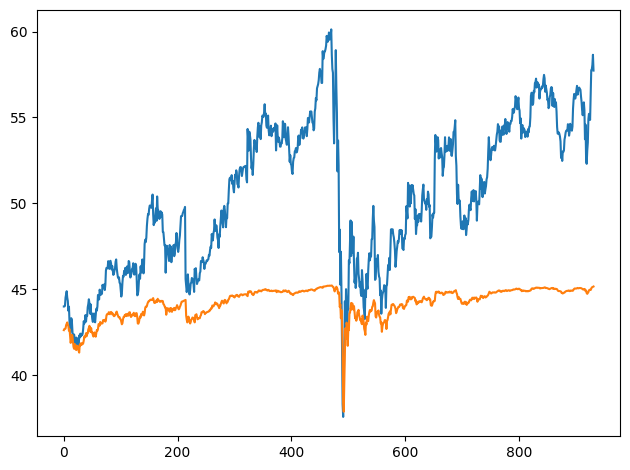

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [419]:
model = tf.keras.Sequential()
model.add(GRU(128,  return_sequences=True, input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
model.add(GRU(64))

model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'Data 2 GRU L2 U128,64, Adam', X_test_1, y_test_1)




### LSTM Bidirectional

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 280.2058 - mean_absolute_error: 11.6743 - val_loss: 2.7626 - val_mean_absolute_error: 1.4076
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1886 - mean_absolute_error: 0.2851 - val_loss: 1.1868 - val_mean_absolute_error: 0.8611
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1592 - mean_absolute_error: 0.2651 - val_loss: 1.1866 - val_mean_absolute_error: 0.8726
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1456 - mean_absolute_error: 0.2463 - val_loss: 0.6733 - val_mean_absolute_error: 0.6241
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1409 - mean_absolute_error: 0.2454 - val_loss: 0.7387 - val_mean_absolute_error: 0.6693
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1522 - mean_absolute_error: 0.2541 - val_loss: 2.3168 - val_mean_absolute_error: 1.4068
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1596 - mean_absolute_error: 0.2670 - val_loss:

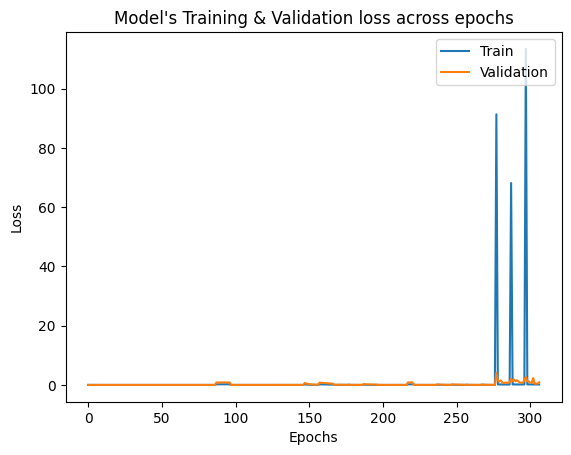

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


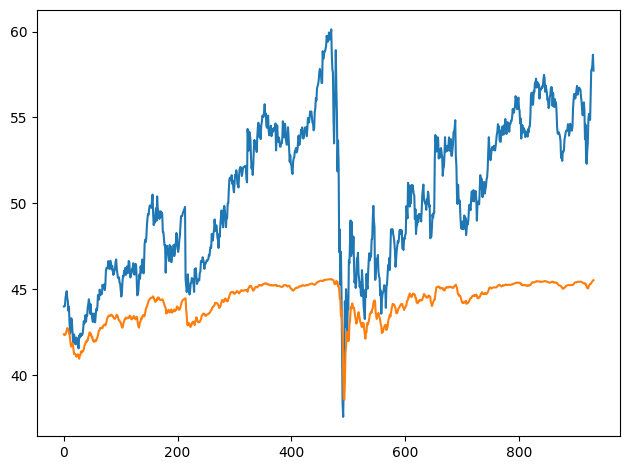

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [420]:
from keras.layers import  Bidirectional

model = tf.keras.Sequential()
model.add(Bidirectional(LSTM(64, input_shape = (X_train_1.shape[1],X_train_1.shape[2])) ))

model.add(Dense(64,activation="relu"))

model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])


plotloss(history)
print_result(model, 'Data 2 Bidirectional LSTM 64', X_test_1, y_test_1)

### LSTM 64,32, Dropout

In [421]:


model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences=True, input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=False))


model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))


model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_154 (LSTM)                 │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_155 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_288 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_289 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_290 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_291 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_292 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 371.7937 - mean_absolute_error: 14.7938 - val_loss: 4.2047 - val_mean_absolute_error: 1.6471
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7434 - mean_absolute_error: 0.6455 - val_loss: 2.3677 - val_mean_absolute_error: 1.1615
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6092 - mean_absolute_error: 0.5697 - val_loss: 2.2114 - val_mean_absolute_error: 1.1227
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4572 - mean_absolute_error: 0.4960 - val_loss: 1.9776 - val_mean_absolute_error: 1.0539
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4352 - mean_absolute_error: 0.4838 - val_loss: 3.1514 - val_mean_absolute_error: 1.4530
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4244 - mean_absolute_error: 0.4741 - val_loss: 3.7339 - val_mean_absolute_error: 1.6300
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4600 - mean_absolute_error: 0.4964 - val_loss

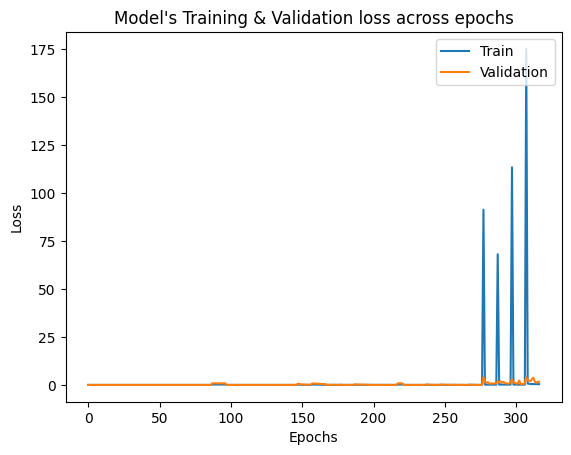

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


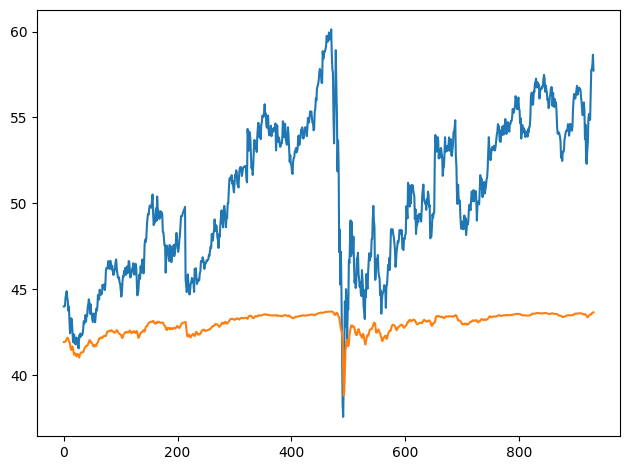

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
1,"SimpleRNN L4 U50, Dropout, Adam",0.290251,-7.767284,0.090480
2,Conv + SimpleRNN U20 dropout Adam,0.121928,-0.545490,0.015950
3,"SimpleRNN U32, Dropout, SGD 0.001",0.331500,-10.470092,0.118373
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
5,"LSTM U64, fully connected, Adam",1.151376,-128.454301,1.335988
6,"LSTM L2 U64,32 Adam",0.285146,-7.580372,0.088551
7,"LSTM U32, 16, Dropout, Adam",0.258421,-6.217996,0.074491
8,"LSTM L4 U50, dropout, Adam",0.147101,-1.289949,0.023633
9,LSTM U64 Adamax,0.034790,0.806110,0.002001


In [422]:
plotloss(history)
print_result(model, 'Data 2 LSTM L2 u64,32, Dropout, Adam', X_test_1, y_test_1)

# result

In [431]:
results.sort_values(by='mean sqrd')

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.010887,0.973831,0.000270
19,"GRU L2 U64, 32 dropout, Adamax",0.026014,0.897754,0.001055
4,"LSTM U64, Adam",0.023087,0.897635,0.001056
13,"LSTM L2 U50, dropout custom loss Adamax",0.027579,0.866248,0.001380
9,LSTM U64 Adamax,0.034790,0.806110,0.002001
28,"LSTM U64, custom loss Adam",0.042722,0.766394,0.002411
17,"GRU L2 U64,16, dropout, Adam",0.046529,0.741882,0.002664
10,"LSTM L2 U50, dropout Adamax",0.048523,0.704027,0.003054
16,"GRU L4 U50, Adam",0.054610,0.640104,0.003714
29,"GRU L4 U50, Dropout, custom loss, Adamax",0.072018,0.409433,0.006095
